<class 'matplotlib.figure.Figure'>


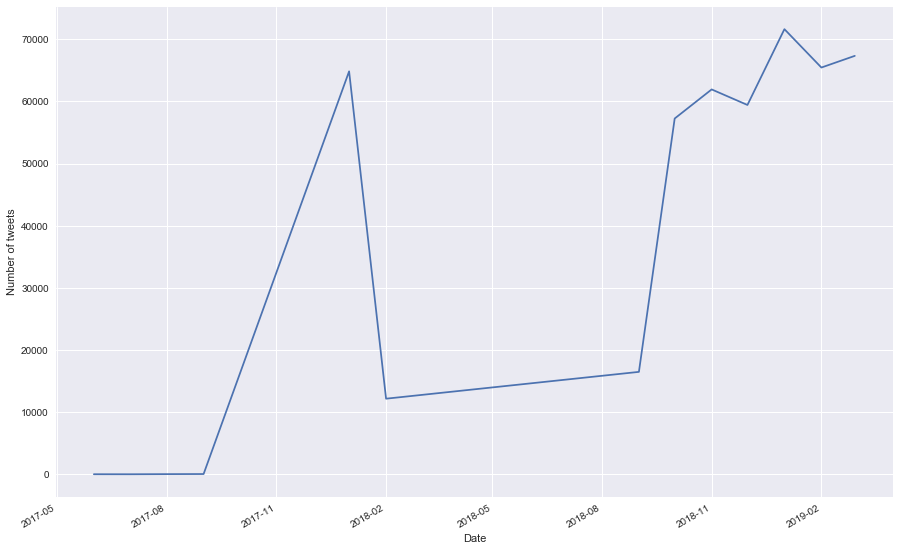

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime
filter_ = datetime.date(2016, 1, 1)
import numpy as np
import matplotlib.pyplot as plt
import mpld3

mpld3.enable_notebook()
from mpld3 import display_d3

#parse_dates=[3, 14]
df_origin = pd.read_csv('data/test/metoodata.csv', delimiter=';',  encoding='utf8', engine='python')
df = df_origin.copy()
df['dt'] = pd.to_datetime(df['created_date'])
df['dt'] = df['dt'].apply(lambda x: str(x.year)+'-' +str(x.month))#.apply(lambda x: str(x) + '-' + str(x.month))#.apply(lambda x: str(x))
df = df[df['dt'] > '2017-5']

df = df.sort_values(by=['dt'], ascending=True)
df['dt'] = pd.to_datetime(df['dt'],dayfirst=True, errors='coerce')
#df = df[df['dt'] != '2018-03-01']
array = ['2018-03-01', '2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01']
df = df.loc[~df['dt'].isin(array)]
#df = df[df['dt'] != '2018-3']
#df['dt'].unique() #= df[df['dt']>'2016']
#df["time"]= df["created_date"].str.split(" ", n = 1, expand = True)[1]

#df['dt'] = pd.to_datetime(df['date'],dayfirst=True, errors='coerce')
#df['dt'] = df[df['dt'] > filter_]
df['uniqueid'] = df.index
hour_counts = df.groupby(df['dt'])['uniqueid'].count()
#print(hour_counts)
fig = plt.figure(figsize=(15, 10))
# Plot time series of total number of tweets
hour_counts.plot();#lw=3, rot=60
plt.ylabel('Number of tweets');#, fontsize=10
plt.xlabel('Date'); #, fontsize=10
print(type(fig))
html = mpld3.fig_to_html(fig)
file = open("html_files/totalNumTweets.html","w")
file.write(html) 
file.close()

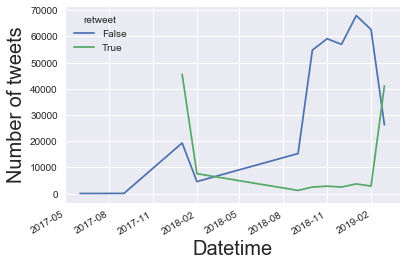

In [3]:
# Group by whether it is a retweet or not
#df['retweet'] = df.text_retweet.isnull() == 0 ## is it a retweet or not?
df['retweet'] = df['is_retweet']#.map({'True': 'Yes', 'False': 'No'}) # Map to strings that mean something
hour_counts_by_rt = df.groupby(['dt', 'retweet'])['uniqueid'].count()
#hour_counts_by_rt.head()
# Plot two time series: retweets and original tweets
#fig = plt.figure(figsize=(15, 10))
#hour_counts_by_rt = hour_counts_by_rt.unstack(level=1).plot(lw=3, rot=60,figsize=(15, 10));
hour_counts_by_rt.unstack(level=1).plot()
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Datetime', fontsize=20);
html = mpld3.fig_to_html(fig)
file = open("html_files/allretweetcount.html","w")
file.write(html) 
file.close()

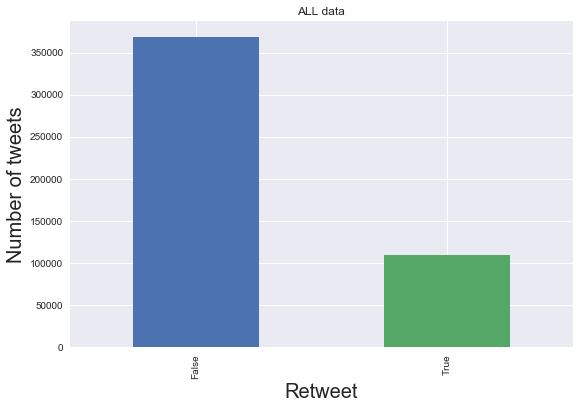

In [2]:
# Plot barplot of retweets and original tweets
df_rwt = df_origin
#df_rwt = df_rwt[df_rwt['source'] == 'twitter']
df_rwt['uniqueid'] = df_rwt.index
df_rwt = df_rwt.groupby(['is_retweet'])['uniqueid'].count()
fig = plt.figure(figsize=(15, 10))
df_rwt.plot(figsize=(9,6), kind='bar');
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Retweet', fontsize=20);
plt.title('ALL data')
html = mpld3.fig_to_html(fig)
file = open("html_files/allretweetcount.html","w")
file.write(html) 
file.close()

/Users/marthagarcia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


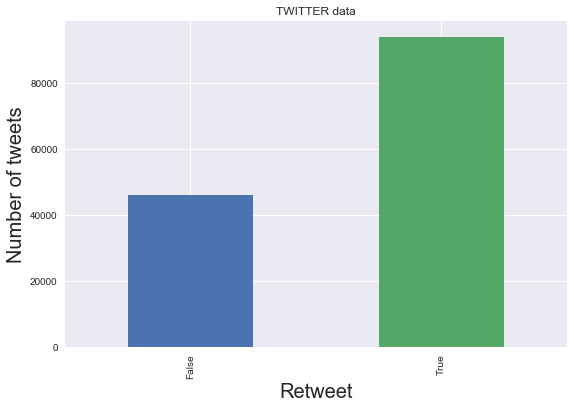

In [107]:
# Plot barplot of retweets and original tweets
df_rwt = df_origin
df_rwt = df_rwt[df_rwt['source'] == 'twitter']
df_rwt['uniqueid'] = df_rwt.index
df_rwt = df_rwt.groupby(['is_retweet'])['uniqueid'].count()
fig = plt.figure(figsize=(15, 10))
df_rwt.plot(figsize=(9,6), kind='bar');
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Retweet', fontsize=20);
plt.title('TWITTER data')
html = mpld3.fig_to_html(fig)
file = open("html_files/twitterretweetcount.html","w")
file.write(html) 
file.close()

/Users/marthagarcia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


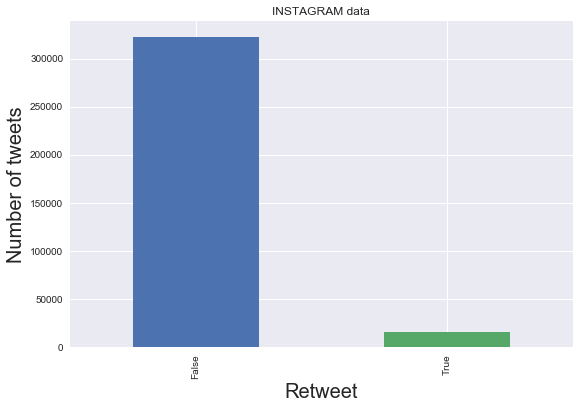

In [3]:
# Plot barplot of retweets and original tweets
df_rwt = df_origin
df_rwt = df_rwt[df_rwt['source'] == 'instagram']
df_rwt['uniqueid'] = df_rwt.index
df_rwt = df_rwt.groupby(['is_retweet'])['uniqueid'].count()
fig = plt.figure(figsize=(15, 10))
df_rwt.plot(figsize=(9,6), kind='bar');
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Retweet', fontsize=20);
plt.title('INSTAGRAM data')
html = mpld3.fig_to_html(fig)
file = open("html_files/instagramrwtcount.html","w")
file.write(html) 
file.close()

  language_desc  uniqueid
0       english    466225
1        french      3311
2        german      1910
3         hindi        43
4       italian       526
5       spanish      6305
6       swedish       652


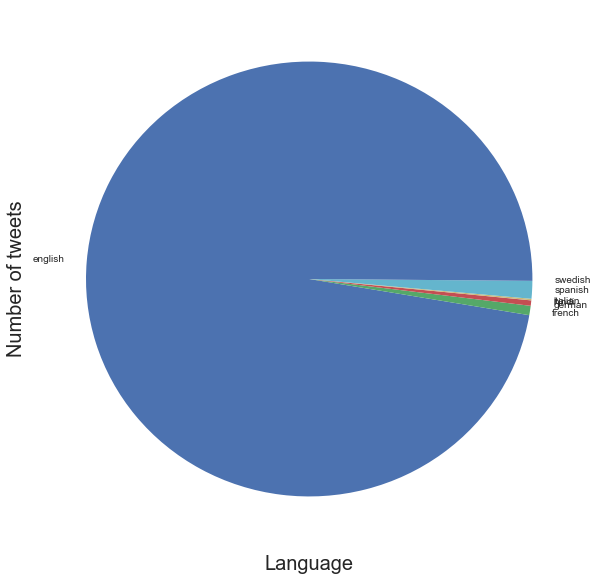

In [38]:

# Map Language to human-readable language name
#df['Language'] = df['language'].map({'en': 'English', 'und': 'Unidentified', 'fr': 'French', 'nl': 'Dutch',
#                                'de': 'German', 'sv': 'Swedish', 'ja': 'Japanese', 'es': 'Spanish', 'ko': 'Korean',
#                                'it': 'Italian'})


# Plot barplot of number of tweets by language
df_origin['uniqueid'] = df_origin.index
df_lang = df_origin.groupby(['language_desc'])['uniqueid'].count()#.sort_values(ascending=False)#.head(n=10)

df_lang.plot(figsize=(10,10), kind='pie');
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Language', fontsize=20);
df_lang  = df_lang.reset_index()


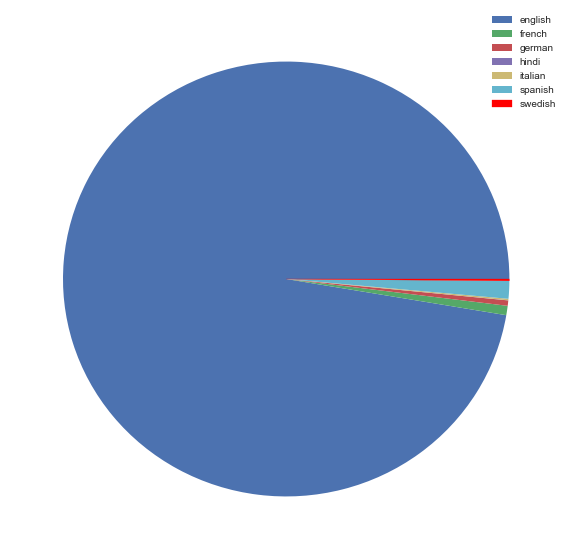

In [91]:
df_origin['uniqueid'] = df_origin.index
df_lang = df_origin.groupby(['language_desc'])['uniqueid'].count()#.sort_values(ascending=False)#.head(n=10)

df_lang  = df_lang.reset_index()

fig = plt.figure(figsize=(10, 10))
sizes = df_lang['uniqueid']
labels = df_lang['language_desc']
patches, texts = plt.pie(sizes)
patches[6].set_color('r')
plt.legend(patches, labels, loc="best")


#plt.ylabel('Number of tweets');
#plt.xlabel('Language');
html = mpld3.fig_to_html(fig)
file = open("html_files/languages.html","w")
file.write(html) 
file.close()

In [18]:
#weets were English language?
df['en'] = df['language'] == 'en'
df.en.sum()/len(df)

0.9486394766610837

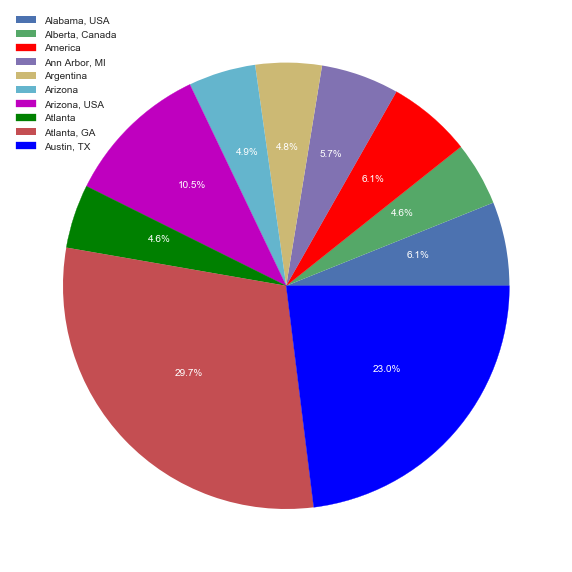

In [85]:


def filter_locations(location):
    invalid_location_list=["Near me ... most of the time ...", "United States","California, USA", "Los Angeles, CA",  "New York, NY", "Washington, DC", "Montana"]
    updated_location=[]
    for each_location in location:
        for each_invalid_item in invalid_location_list:
            if(each_location==each_invalid_item):
                each_location="USA"
                updated_location.append(each_location)
                return updated_location


#df_origin.dropna(subset=['location'])
df_origin['uniqueid'] = df_origin.index
df_location = df_origin[['location', 'uniqueid']].dropna()

#df_origin['location'].unique

#filter_location_udf=udf(filter_locations, types.ArrayType(types.StringType(), False))
#df_origin['location_update'] = df_origin[['location']].apply(filter_locations)  

# Plot barplot of number of tweets by language
#plt.ylabel('Number of tweets', fontsize=20);

#plt.xlabel('Location', fontsize=20);
df_location = df_location.groupby(['location']).count().reset_index()
df_location = df_location[df_location['uniqueid']>50].head(10)


sizes = df_location['uniqueid']
labels = df_location['location']

#fig = plt.figure(figsize=(15, 18))
#patches, texts = plt.pie(sizes)
#plt.legend(patches, labels, loc="best")

#plt.xlabel('Location')
#plt.ylabel('Number of tweets')
    
#html = mpld3.fig_to_html(fig)




fig, ax = plt.subplots(figsize=(10, 15), subplot_kw=dict(aspect="equal"))



#sizes = [float(x.split()[0]) for x in sizes]
#labels = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes),
                                  textprops=dict(color="w"))
wedges[2].set_color('r')
wedges[6].set_color('m')
wedges[7].set_color('g')
wedges[9].set_color('b')
plt.legend(wedges, labels, loc="best")
#plt.show()
html = mpld3.fig_to_html(fig)
file = open("html_files/location.html","w")
file.write(html) 
file.close()
#.sort_values(ascending=False).head(n=10).plot(figsize=(9,6), kind='bar');

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xticklabels'

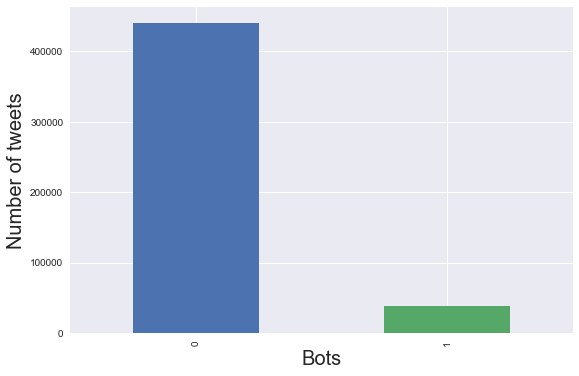

In [6]:


fig = plt.figure(figsize=(10, 10))
df_bh = pd.read_csv('prediction_bot_humans.csv', delimiter=';',  encoding='utf8', engine='python')
df_bh['uniqueid']=df_bh.index
df_bh = df_bh.groupby(['bot'])['uniqueid'].count()
df_bh.plot(figsize=(9,6), kind='bar');
plt.ylabel('Number of tweets', fontsize=20);
plt.xlabel('Bots', fontsize=20);
labels = [item.get_text() for item in plt.get_xticklabels()]
labels[0] = 'Humans'
labels[1] = 'Bots'
#plt.legend(['Humans','Bots'])
#html = mpld3.fig_to_html(fig)
#file = open("html_files/bot_human.html","w")
#file.write(html) 
#file.close()